In [7]:

import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
import pickle
Z_MODELING = [0.644, 0.888, 1.173, 1.499]
FILENAME = lambda z: f'../outs/{z:.2f}/power_spectra_ensemble_{z:.2f}.npz'
datas = []
for Z in Z_MODELING:
    with open(FILENAME(Z), 'rb') as f:
        data = pickle.load(f)
        datas.append(data)

In [9]:
autocross = [
    ('ps_cii', 'ps_galaxy', 'ps_cross_ciixgalaxy'),
    ('ps_co', 'ps_galaxy', 'ps_cross_coxgalaxy'),
    ('ps_hi', 'ps_galaxy', 'ps_cross_hixgalaxy'),
    ('ps_cii', 'ps_co', 'ps_cross_ciixco'),
    ('ps_cii', 'ps_hi', 'ps_cross_ciixhi'),
    ('ps_co', 'ps_hi', 'ps_cross_coxhi'),
]

redshifts = [data['z_modeling'] for data in datas]

ks = [data['k'] for data in datas]

print(redshifts)

[0.644, 0.888, 1.173, 1.499]


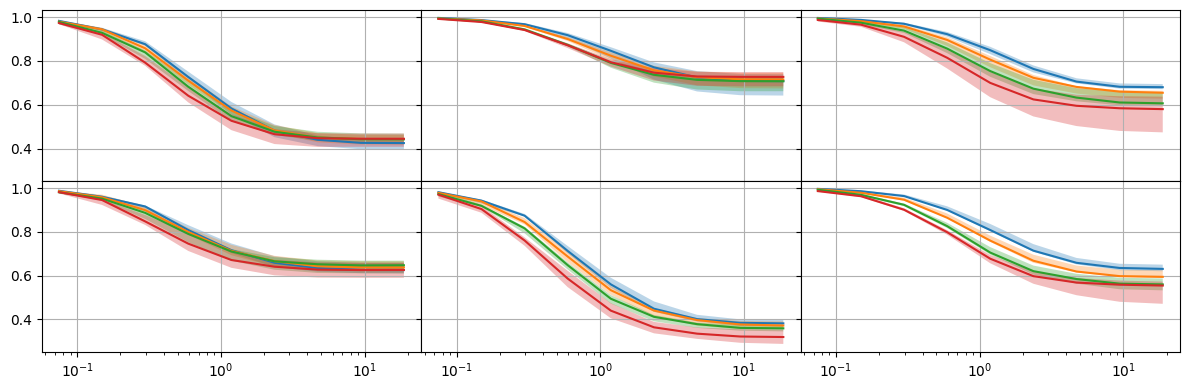

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
axs = axs.flatten()

for i, (ax, ac) in enumerate(zip(axs, autocross)):
    a1, a2, c = ac
    ccc = [data[c] / np.sqrt(data[a1] * data[a2]) for data in datas]
    cccmedian = [np.median(cc, axis=0) for cc in ccc]
    percentiles = [16, 50, 84]
    ccclow = [np.percentile(cc, percentiles[0], axis=0) for cc in ccc]
    cccup = [np.percentile(cc, percentiles[2], axis=0) for cc in ccc]
    
    for j, z in enumerate(redshifts):
        ax.fill_between(ks[j], ccclow[j], cccup[j], alpha=0.3)
        ax.plot(ks[j], cccmedian[j], label=f'z={z:.2f}')
    ax.grid(True)
    ax.set_xscale('log')

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()
plt.close()

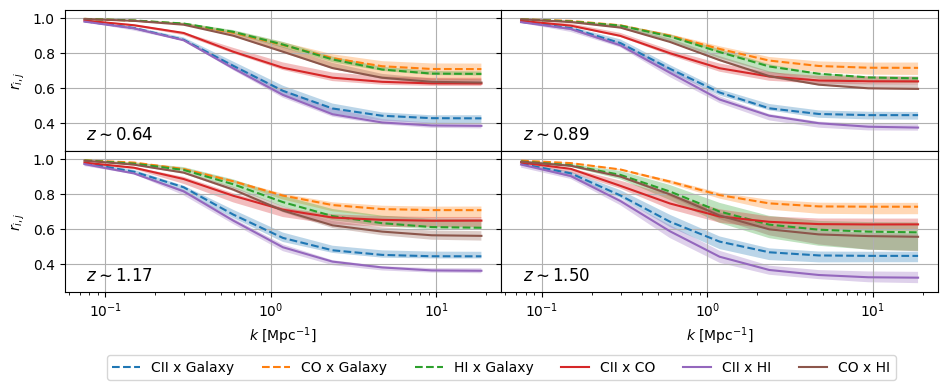

In [11]:
labels = ['CII x Galaxy', 'CO x Galaxy', 'HI x Galaxy', 'CII x CO', 'CII x HI', 'CO x HI']
ls = ['--', '--', '--', '-', '-', '-']

fig, axs = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=True)
axs = axs.flatten()

for i, (z, ax) in enumerate(zip(redshifts, axs)):
    for j, ac in enumerate(autocross):
        
        a1, a2, c = ac
        ccc = [data[c] / np.sqrt(data[a1] * data[a2]) for data in datas]
        cccmedian = [np.median(cc, axis=0) for cc in ccc]
        percentiles = [16, 50, 84]
        ccclow = [np.percentile(cc, percentiles[0], axis=0) for cc in ccc]
        cccup = [np.percentile(cc, percentiles[2], axis=0) for cc in ccc]
        ax.fill_between(ks[i], ccclow[i], cccup[i], alpha=0.3)
        ax.plot(ks[i], cccmedian[i], label=labels[j], ls=ls[j])
    ax.text(0.05, 0.05, r'$z\sim$' f'{z:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')
    ax.set_ylim(0.24, 1.05)
    ax.grid(True)
    ax.set_xscale('log')

axs[3].legend(bbox_to_anchor=(0, -0.4), loc='upper center', ncol=6, fontsize=10)
axs[2].set_xlabel(r'$k$ $[\mathrm{Mpc}^{-1}]$')
axs[3].set_xlabel(r'$k$ $[\mathrm{Mpc}^{-1}]$')
axs[0].set_ylabel('$r_{i,j}$')
axs[2].set_ylabel('$r_{i,j}$')


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('ccc_all_z.pdf', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [21]:
labels = ['CII x Galaxy', 'CO x Galaxy', 'HI x Galaxy', 'CII x CO', 'CII x HI', 'CO x HI']
ls = ['--', '--', '--', '-', '-', '-']

fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharex=True, sharey=True)
axs = axs.flatten()

redshifts = np.array(redshifts)
redshifts_idxs = [0, -1]

for i, z, ax in zip(redshifts_idxs, redshifts[redshifts_idxs], axs):
    for j, ac in enumerate(autocross):
        
        a1, a2, c = ac
        ccc = [data[c] / np.sqrt(data[a1] * data[a2]) for data in datas]
        cccmedian = [np.median(cc, axis=0) for cc in ccc]
        percentiles = [16, 50, 84]
        ccclow = [np.percentile(cc, percentiles[0], axis=0) for cc in ccc]
        cccup = [np.percentile(cc, percentiles[2], axis=0) for cc in ccc]
        ax.fill_between(ks[i], ccclow[i], cccup[i], alpha=0.3)
        ax.plot(ks[i], cccmedian[i], label=labels[j], ls=ls[j])
    ax.text(0.05, 0.05, r'$z\sim$' f'{z:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')
    ax.set_ylim(0.24, 1.05)
    ax.grid(True)
    ax.set_xscale('log')

axs[1].legend(bbox_to_anchor=(0, -0.4), loc='upper center', ncol=6, fontsize=10)
axs[0].set_xlabel(r'$k$ $[\mathrm{Mpc}]^{-1}$')
axs[1].set_xlabel(r'$k$ $[\mathrm{Mpc}]^{-1}$')
axs[0].set_ylabel('CCC')


plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('ccc_two_z.pdf', dpi=300, bbox_inches='tight')
# plt.show()
plt.close()